In [102]:
import os 
# os.chdir("MyPath/PyLab/Chapter09")
os.chdir("D:\LasVegas")
import pandas as pd
import numpy
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [103]:
df = pd.read_csv("Immunotherapy.csv")
#df


In [104]:
# Change dataframe to array
#datatrain.set_value(datatrain['species']=='Iris-setosa',['species'],0)
#datatrain.set_value(datatrain['species']=='Iris-versicolor',['species'],1)
#datatrain.set_value(datatrain['species']=='Iris-virginica',['species'],2)
df = df.apply(pd.to_numeric)
df_array = df.as_matrix()



In [105]:
# Split x and y (feature and target)
X_train, X_test, y_train, y_test = train_test_split(df_array[:,:7],
                                                    df_array[:,7],
test_size=0.3)

In [106]:
mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',learning_rate_init=0.01,max_iter=500)


In [107]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [108]:
test = pd.read_csv("Imm_test.csv")
test

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,2,33,8.00,3,1,502,8,1
1,1,34,5.00,7,3,64,7,0
2,2,41,11.00,11,2,21,6,0
3,1,29,8.75,3,1,504,2,1
4,2,22,8.50,5,1,99,8,1
5,1,45,11.25,4,1,72,5,0
6,2,22,8.25,9,1,352,3,1
7,1,35,8.75,10,2,69,7,1
8,2,34,8.50,1,2,163,7,0


In [109]:
print (mlp.score(X_train, y_train))

0.746031746031746


In [110]:
print (mlp.predict(X_test))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [111]:
test = test.apply(pd.to_numeric)
t_array = test.as_matrix()

In [112]:
print (mlp.predict(t_array[:,:7]))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


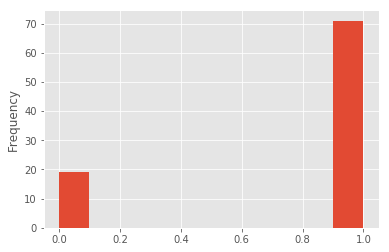

In [113]:
df.Result_of_Treatment.plot('hist')
plt.show()

In [116]:
X = t_array[:,:7]
y = t_array[:,7]

In [120]:
_ = pd.plotting.scatter_matrix(df, c = X, figsize = [8, 8], s =150, marker ='D')

ValueError: RGBA sequence should have length 3 or 4